In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from numpy import absolute, mean, std
#import lightgbm as lgbm
#from catboost import CatBoostRegressor

In [2]:
df1 = pd.read_csv('munich-session-gis.csv')
df1=df1.drop(['network_display_name', 'has_l2', 'payment_type', 'tou_status', 'currency_iso_code', 'network_logo_url', 'address2', 'parking_accessibility', 'can_remote_start_charge', 'can_remote_start_charge', 'access_restriction', 'parking_label', 'name2', 'has_dc', 'max_power'], axis=1)
df1

,fid,device_id,count_in_use,lat,lon,station_status,display_level,name1,address1,city,...,_otogar_network1,_otoparklar_network1,_otoyol_kavsagi_network1,_parklar_network1,_restoran_network1,_sinema_network1,_stadyum_network1,_tramvay_network1,_tren_network1,_universiteler_network1
0,1,2830225,0,48.145280,11.536327,closed,AC,MB-MUENCHEN,61 Arnulfstraße,München,...,90,100,100,100,100,100,60,100,90,90
1,2,2830235,0,48.145252,11.536413,closed,AC,MB-MUENCHEN,61 Arnulfstraße,München,...,90,100,100,100,100,100,60,100,90,90
2,3,2830245,0,48.145256,11.536456,closed,AC,MB-MUENCHEN,61 Arnulfstraße,München,...,90,100,100,100,100,100,60,100,90,90
3,4,2830255,0,48.145253,11.536495,closed,AC,MB-MUENCHEN,61 Arnulfstraße,München,...,90,100,100,100,100,100,60,100,90,90
4,5,2830265,0,48.145499,11.536684,closed,AC,MB-MUENCHEN,Arnulfstraße 61,München,...,90,100,100,100,100,100,60,100,90,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,514,1011983955,3244,48.102905,11.546533,in_use,AC,056302 Alfred-Schmidt-Str. 34a,Alfred-Schmidt-Straße 34A,München,...,60,100,90,100,100,70,70,80,90,90
514,515,1012062735,0,48.106392,11.599985,available,AC,ChargeOne (Claus Heinemann Elektroanlagen GmbH) -,Aschauer Straße 12,München,...,50,100,90,100,100,70,80,100,60,90
515,516,1012062745,72,48.106403,11.599995,available,AC,ChargeOne (Claus Heinemann Elektroanlagen GmbH) -,Aschauer Straße 12,München,...,50,100,90,100,100,70,80,100,60,90
516,517,1012062755,0,48.106403,11.599985,available,AC,ChargeOne (Claus Heinemann Elektroanlagen GmbH) -,Aschauer Straße 12,München,...,50,100,90,100,100,70,80,100,60,90


In [2]:
df = pd.read_csv('session_682.csv')
df=df.drop(['network_display_name', 'has_l2', 'payment_type', 'tou_status', 'currency_iso_code', 'network_logo_url', 'address2', 'parking_accessibility', 'can_remote_start_charge', 'can_remote_start_charge', 'access_restriction', 'parking_label', 'name2', 'has_dc', 'max_power'], axis=1)
df

/var/folders/yn/yhyygfsj1pvdbcdkd6388wwm0000gn/T/ipykernel_1151/2968202653.py:1: DtypeWarning: Columns (16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('session_682.csv')


,lat,lon,station_status,device_id,display_level,name1,address1,city,datetime
0,45.477734,9.195445,available,1008307385,AC,Connettore Sinis Milano | Piazza della Repubblica,Piazza della Repubblica,Milano,2023-12-06 22:42:05.540226
1,45.477734,9.195471,available,1008307715,AC,Connettore Destr Milano | Piazza della Repubblica,Piazza della Repubblica,Milano,2023-12-06 22:42:05.540226
2,45.477306,9.189315,available,1004284295,AC,10T2001AF00011*1 20ZH10T2001AF00011,"Via San Marco, 30",Milano,2023-12-06 22:42:05.540226
3,45.477306,9.189315,available,1004288155,AC,10T2001AF00029*1 20ZH10T2001AF00029,"Via San Marco, 30",Milano,2023-12-06 22:42:05.540226
4,45.477314,9.189270,available,1004281845,AC,10T2001AF00015*1 20ZH10T2001AF00015,"Via San Marco, 30",Milano,2023-12-06 22:42:05.540226
...,...,...,...,...,...,...,...,...,...
409195,48.139332,11.587529,available,1004550895,AC,010302 Pfarrstr. 3,Pfarrstr. 3,München,2023-12-12 10:08:50.219562
409196,48.139332,11.587502,available,1004550715,AC,010301 Pfarrstr. 3,Pfarrstr. 3,München,2023-12-12 10:08:50.219562
409197,48.141392,11.586725,in_use,1004541745,AC,009402 Liebigstr. 5a,Liebigstr. 5A,München,2023-12-12 10:08:50.219562
409198,48.141392,11.586698,available,1004541525,AC,009401 Liebigstr. 5a,Liebigstr. 5A,München,2023-12-12 10:08:50.219562


In [3]:
df['count'] = df.groupby('device_id')['station_status'].transform(lambda x: (x == 'in_use').sum())
df

,lat,lon,station_status,device_id,display_level,name1,address1,city,datetime,count
0,45.477734,9.195445,available,1008307385,AC,Connettore Sinis Milano | Piazza della Repubblica,Piazza della Repubblica,Milano,2023-12-06 22:42:05.540226,110
1,45.477734,9.195471,available,1008307715,AC,Connettore Destr Milano | Piazza della Repubblica,Piazza della Repubblica,Milano,2023-12-06 22:42:05.540226,44
2,45.477306,9.189315,available,1004284295,AC,10T2001AF00011*1 20ZH10T2001AF00011,"Via San Marco, 30",Milano,2023-12-06 22:42:05.540226,229
3,45.477306,9.189315,available,1004288155,AC,10T2001AF00029*1 20ZH10T2001AF00029,"Via San Marco, 30",Milano,2023-12-06 22:42:05.540226,137
4,45.477314,9.189270,available,1004281845,AC,10T2001AF00015*1 20ZH10T2001AF00015,"Via San Marco, 30",Milano,2023-12-06 22:42:05.540226,47
...,...,...,...,...,...,...,...,...,...,...
409195,48.139332,11.587529,available,1004550895,AC,010302 Pfarrstr. 3,Pfarrstr. 3,München,2023-12-12 10:08:50.219562,969
409196,48.139332,11.587502,available,1004550715,AC,010301 Pfarrstr. 3,Pfarrstr. 3,München,2023-12-12 10:08:50.219562,867
409197,48.141392,11.586725,in_use,1004541745,AC,009402 Liebigstr. 5a,Liebigstr. 5A,München,2023-12-12 10:08:50.219562,489
409198,48.141392,11.586698,available,1004541525,AC,009401 Liebigstr. 5a,Liebigstr. 5A,München,2023-12-12 10:08:50.219562,468


In [5]:
summary_df = df.groupby('device_id').agg(count_in_use=('station_status', lambda x: (x == 'in_use').sum())).reset_index()
summary_df=summary_df.merge(df, on='device_id', how='left')
summary_df=summary_df.drop_duplicates(subset=['device_id'])
summary_df=summary_df.reset_index(drop=True)
summary_df=summary_df.drop(['count', 'station_status'], axis=1)
summary_df

,device_id,count_in_use,lat,lon,display_level,name1,address1,city,datetime
0,2830225,0,48.145280,11.536327,AC,MB-MUENCHEN,61 Arnulfstraße,München,2023-12-06 22:42:47.988366
1,2830235,0,48.145252,11.536413,AC,MB-MUENCHEN,61 Arnulfstraße,München,2023-12-06 22:42:47.988366
2,2830245,0,48.145256,11.536456,AC,MB-MUENCHEN,61 Arnulfstraße,München,2023-12-06 22:42:47.988366
3,2830255,0,48.145253,11.536495,AC,MB-MUENCHEN,61 Arnulfstraße,München,2023-12-06 22:42:47.988366
4,2830265,0,48.145499,11.536684,AC,MB-MUENCHEN,Arnulfstraße 61,München,2023-12-06 22:42:47.988366
...,...,...,...,...,...,...,...,...,...
800,1012047825,21,45.483116,9.159662,AC,E006133 via Fra Gerolamo Savonarola,via Fra Gerolamo Savonarola,Milano,2023-12-06 22:42:17.829441
801,1012062735,0,48.106392,11.599985,AC,ChargeOne (Claus Heinemann Elektroanlagen GmbH) -,Aschauer Straße 12,München,2023-12-06 22:43:00.094896
802,1012062745,36,48.106403,11.599995,AC,ChargeOne (Claus Heinemann Elektroanlagen GmbH) -,Aschauer Straße 12,München,2023-12-06 22:43:00.094896
803,1012062755,0,48.106403,11.599985,AC,ChargeOne (Claus Heinemann Elektroanlagen GmbH) -,Aschauer Straße 12,München,2023-12-06 22:43:00.094896


In [6]:
summary_df.to_csv('chargedata_last01.csv', index=False)

In [29]:
df1 = pd.read_csv('munich-nominal.csv')
df1

,fid,device_id,count_in_u,lat,lon,display_le,name1,address1,city,datetime,...,_meydanlar_network1,_metro_duraklari_network1,_kamu_binalari_network1,_kafe_network1,_hastane_network1,_eczane_network1,_dinlenme_tesisleri_network1,_benzin_istasyonlari_network1,_avm_network1,_atm_network1
0,1,2830225,0,48.145280,11.536327,AC,MB-MUENCHEN,61 Arnulfstraße,München,2023/12/06 22:42:47.988,...,100,90,90,100,80,100,0,90,60,100
1,2,2830235,0,48.145252,11.536413,AC,MB-MUENCHEN,61 Arnulfstraße,München,2023/12/06 22:42:47.988,...,100,90,90,100,80,100,0,90,60,100
2,3,2830245,0,48.145256,11.536456,AC,MB-MUENCHEN,61 Arnulfstraße,München,2023/12/06 22:42:47.988,...,100,90,90,100,80,100,0,90,60,100
3,4,2830255,0,48.145253,11.536495,AC,MB-MUENCHEN,61 Arnulfstraße,München,2023/12/06 22:42:47.988,...,100,90,90,100,80,100,0,90,60,100
4,5,2830265,0,48.145499,11.536684,AC,MB-MUENCHEN,Arnulfstraße 61,München,2023/12/06 22:42:47.988,...,90,90,90,100,80,100,0,90,60,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,511,1011983955,477,48.102905,11.546533,AC,056302 Alfred-Schmidt-Str. 34a,Alfred-Schmidt-Straße 34A,München,2023/12/06 22:43:00.095,...,100,100,80,90,100,90,0,80,40,100
511,512,1012062735,0,48.106392,11.599985,AC,ChargeOne (Claus Heinemann Elektroanlagen GmbH) -,Aschauer Straße 12,München,2023/12/06 22:43:00.095,...,80,100,90,100,80,100,40,100,40,100
512,513,1012062745,36,48.106403,11.599995,AC,ChargeOne (Claus Heinemann Elektroanlagen GmbH) -,Aschauer Straße 12,München,2023/12/06 22:43:00.095,...,80,100,90,100,80,100,40,100,40,100
513,514,1012062755,0,48.106403,11.599985,AC,ChargeOne (Claus Heinemann Elektroanlagen GmbH) -,Aschauer Straße 12,München,2023/12/06 22:43:00.095,...,80,100,90,100,80,100,40,100,40,100


In [30]:
df1 = df1.merge(summary_df, how = 'left', left_on = 'device_id', right_on = 'device_id')
df1=df1.drop(['name1_x', 'address1_x', 'city_x', 'datetime_x', 'lat_y', 'lon_y', 'name1_y', 'address1_y', 'city_y', 'datetime_y', 'count_in_u'], axis=1)
#df1['count_in_u'] = df['count_in_use'].fillna(0)
df1

,fid,device_id,lat_x,lon_x,display_le,_universiteler_network1,_tren_istasyonlari_network1,_tramvay_duraklari_network1,_stadyum_network1,_sinema_network1,...,_kamu_binalari_network1,_kafe_network1,_hastane_network1,_eczane_network1,_dinlenme_tesisleri_network1,_benzin_istasyonlari_network1,_avm_network1,_atm_network1,count_in_use,display_level
0,1,2830225,48.145280,11.536327,AC,90,90,100,60,100,...,90,100,80,100,0,90,60,100,0,AC
1,2,2830235,48.145252,11.536413,AC,90,90,100,60,100,...,90,100,80,100,0,90,60,100,0,AC
2,3,2830245,48.145256,11.536456,AC,90,90,100,60,100,...,90,100,80,100,0,90,60,100,0,AC
3,4,2830255,48.145253,11.536495,AC,90,90,100,60,100,...,90,100,80,100,0,90,60,100,0,AC
4,5,2830265,48.145499,11.536684,AC,90,90,100,60,100,...,90,100,80,100,0,90,60,100,0,AC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,511,1011983955,48.102905,11.546533,AC,90,90,80,70,70,...,80,90,100,90,0,80,40,100,682,AC
511,512,1012062735,48.106392,11.599985,AC,90,60,100,80,70,...,90,100,80,100,40,100,40,100,0,AC
512,513,1012062745,48.106403,11.599995,AC,90,60,100,80,70,...,90,100,80,100,40,100,40,100,36,AC
513,514,1012062755,48.106403,11.599985,AC,90,60,100,80,70,...,90,100,80,100,40,100,40,100,0,AC


In [24]:
summary_df.loc[summary_df['device_id'] == 1011983955]

,device_id,count_in_use,lat,lon,display_level,name1,address1,city,datetime
797,1011983955,682,48.102905,11.546533,AC,056302 Alfred-Schmidt-Str. 34a,Alfred-Schmidt-Straße 34A,München,2023-12-06 22:43:00.094896


In [3]:
#apply normalization techniques by Column 
column = 'count_in_use'
df1['normalizedcount'] = ((df1[column] - df1[column].min()) / (df1[column].max() - df1[column].min())) * 100
df1

,fid,device_id,count_in_use,lat,lon,station_status,display_level,name1,address1,city,...,_otoparklar_network1,_otoyol_kavsagi_network1,_parklar_network1,_restoran_network1,_sinema_network1,_stadyum_network1,_tramvay_network1,_tren_network1,_universiteler_network1,normalizedcount
0,1,2830225,0,48.145280,11.536327,closed,AC,MB-MUENCHEN,61 Arnulfstraße,München,...,100,100,100,100,100,60,100,90,90,0.000000
1,2,2830235,0,48.145252,11.536413,closed,AC,MB-MUENCHEN,61 Arnulfstraße,München,...,100,100,100,100,100,60,100,90,90,0.000000
2,3,2830245,0,48.145256,11.536456,closed,AC,MB-MUENCHEN,61 Arnulfstraße,München,...,100,100,100,100,100,60,100,90,90,0.000000
3,4,2830255,0,48.145253,11.536495,closed,AC,MB-MUENCHEN,61 Arnulfstraße,München,...,100,100,100,100,100,60,100,90,90,0.000000
4,5,2830265,0,48.145499,11.536684,closed,AC,MB-MUENCHEN,Arnulfstraße 61,München,...,100,100,100,100,100,60,100,90,90,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,514,1011983955,3244,48.102905,11.546533,in_use,AC,056302 Alfred-Schmidt-Str. 34a,Alfred-Schmidt-Straße 34A,München,...,100,90,100,100,70,70,80,90,90,68.366702
514,515,1012062735,0,48.106392,11.599985,available,AC,ChargeOne (Claus Heinemann Elektroanlagen GmbH) -,Aschauer Straße 12,München,...,100,90,100,100,70,80,100,60,90,0.000000
515,516,1012062745,72,48.106403,11.599995,available,AC,ChargeOne (Claus Heinemann Elektroanlagen GmbH) -,Aschauer Straße 12,München,...,100,90,100,100,70,80,100,60,90,1.517387
516,517,1012062755,0,48.106403,11.599985,available,AC,ChargeOne (Claus Heinemann Elektroanlagen GmbH) -,Aschauer Straße 12,München,...,100,90,100,100,70,80,100,60,90,0.000000


In [4]:
df1.isnull().sum()

fid                              0
device_id                        0
count_in_use                     0
lat                              0
lon                              0
station_status                   0
display_level                    0
name1                            0
address1                         0
city                             0
datetime                         0
_atm_network1                    0
_avm_network1                    0
_benzin_istasyonlari_network1    0
_dinlenme_tesisleri_network1     0
_eczane_network1                 0
_hastane_network1                0
_kafe_network1                   0
_kamu_binalari_network1          0
_metro_duraklari_network1        0
_meydanlar_network1              0
_okullar_network1                0
_oteller_network1                0
_otobus_duraklari_network1       0
_otogar_network1                 0
_otoparklar_network1             0
_otoyol_kavsagi_network1         0
_parklar_network1                0
_restoran_network1  

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   fid                            515 non-null    int64  
 1   device_id                      515 non-null    int64  
 2   display_le                     515 non-null    object 
 3   _universiteler_network1        515 non-null    int64  
 4   _tren_istasyonlari_network1    515 non-null    int64  
 5   _tramvay_duraklari_network1    515 non-null    int64  
 6   _stadyum_network1              515 non-null    int64  
 7   _sinema_network1               515 non-null    int64  
 8   _restoran_network1             515 non-null    int64  
 9   _parklar_network1              515 non-null    int64  
 10  _otoyol_kavsagi_network1       515 non-null    int64  
 11  _otoparklar_network1           515 non-null    int64  
 12  _otogar_network1               515 non-null    int

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
fid,518.0,2.595000e+02,1.496780e+02,1.000000e+00,1.302500e+02,2.595000e+02,3.887500e+02,5.180000e+02
device_id,518.0,9.826126e+08,1.509462e+08,2.830225e+06,1.004524e+09,1.004563e+09,1.006825e+09,1.012063e+09
count_in_use,518.0,7.621429e+02,1.179461e+03,0.000000e+00,0.000000e+00,4.000000e+00,1.406500e+03,4.745000e+03
lat,518.0,4.814457e+01,2.438676e-02,4.809095e+01,4.813246e+01,4.814527e+01,4.815319e+01,4.818697e+01
lon,518.0,1.158083e+01,2.723596e-02,1.152823e+01,1.155691e+01,1.158240e+01,1.160255e+01,1.162139e+01
_atm_network1,518.0,9.718147e+01,4.630431e+00,8.000000e+01,9.000000e+01,1.000000e+02,1.000000e+02,1.000000e+02
_avm_network1,518.0,5.295367e+01,1.131413e+01,4.000000e+01,4.000000e+01,5.000000e+01,6.000000e+01,8.000000e+01
_benzin_istasyonlari_network1,518.0,9.194981e+01,6.944195e+00,7.000000e+01,9.000000e+01,9.000000e+01,1.000000e+02,1.000000e+02
_dinlenme_tesisleri_network1,518.0,1.930502e+00,8.581107e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01
_eczane_network1,518.0,9.830116e+01,4.055948e+00,8.000000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02


In [8]:
numerical_data = df1.select_dtypes(include=['number'])
numerical_data = numerical_data.drop(['fid','device_id','lat','lon'], axis=1)
numerical_data

,count_in_use,_atm_network1,_avm_network1,_benzin_istasyonlari_network1,_dinlenme_tesisleri_network1,_eczane_network1,_hastane_network1,_kafe_network1,_kamu_binalari_network1,_metro_duraklari_network1,...,_otoparklar_network1,_otoyol_kavsagi_network1,_parklar_network1,_restoran_network1,_sinema_network1,_stadyum_network1,_tramvay_network1,_tren_network1,_universiteler_network1,normalizedcount
0,0,100,60,90,0,100,80,100,90,90,...,100,100,100,100,100,60,100,90,90,0.000000
1,0,100,60,90,0,100,80,100,90,90,...,100,100,100,100,100,60,100,90,90,0.000000
2,0,100,60,90,0,100,80,100,90,90,...,100,100,100,100,100,60,100,90,90,0.000000
3,0,100,60,90,0,100,80,100,90,90,...,100,100,100,100,100,60,100,90,90,0.000000
4,0,100,60,90,0,100,80,100,90,90,...,100,100,100,100,100,60,100,90,90,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,3244,100,40,80,0,90,100,90,80,100,...,100,90,100,100,70,70,80,90,90,68.366702
514,0,100,40,100,40,100,80,100,90,100,...,100,90,100,100,70,80,100,60,90,0.000000
515,72,100,40,100,40,100,80,100,90,100,...,100,90,100,100,70,80,100,60,90,1.517387
516,0,100,40,100,40,100,80,100,90,100,...,100,90,100,100,70,80,100,60,90,0.000000


In [7]:
print(numerical_data.columns.values)
print(len(numerical_data.columns.values))

corrmat = numerical_data.corr()
fig, ax = plt.subplots(figsize=(22, 22))
sns.set(font_scale=2)
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, annot_kws={'size': 12}, fmt='.2f')
plt.show()

['count_in_use' '_atm_network1' '_avm_network1'
 '_benzin_istasyonlari_network1' '_dinlenme_tesisleri_network1'
 '_eczane_network1' '_hastane_network1' '_kafe_network1'
 '_kamu_binalari_network1' '_metro_duraklari_network1'
 '_meydanlar_network1' '_okullar_network1' '_oteller_network1'
 '_otobus_duraklari_network1' '_otogar_network1' '_otoparklar_network1'
 '_otoyol_kavsagi_network1' '_parklar_network1' '_restoran_network1'
 '_sinema_network1' '_stadyum_network1' '_tramvay_network1'
 '_tren_network1' '_universiteler_network1' 'normalizedcount']
25


['count_in_use' 'normalizedcount' '_stadyum_network1' '_atm_network1'
 '_tren_network1' '_sinema_network1' '_tramvay_network1'
 '_otobus_duraklari_network1' '_kamu_binalari_network1' '_otogar_network1'
 '_otoyol_kavsagi_network1' '_hastane_network1']


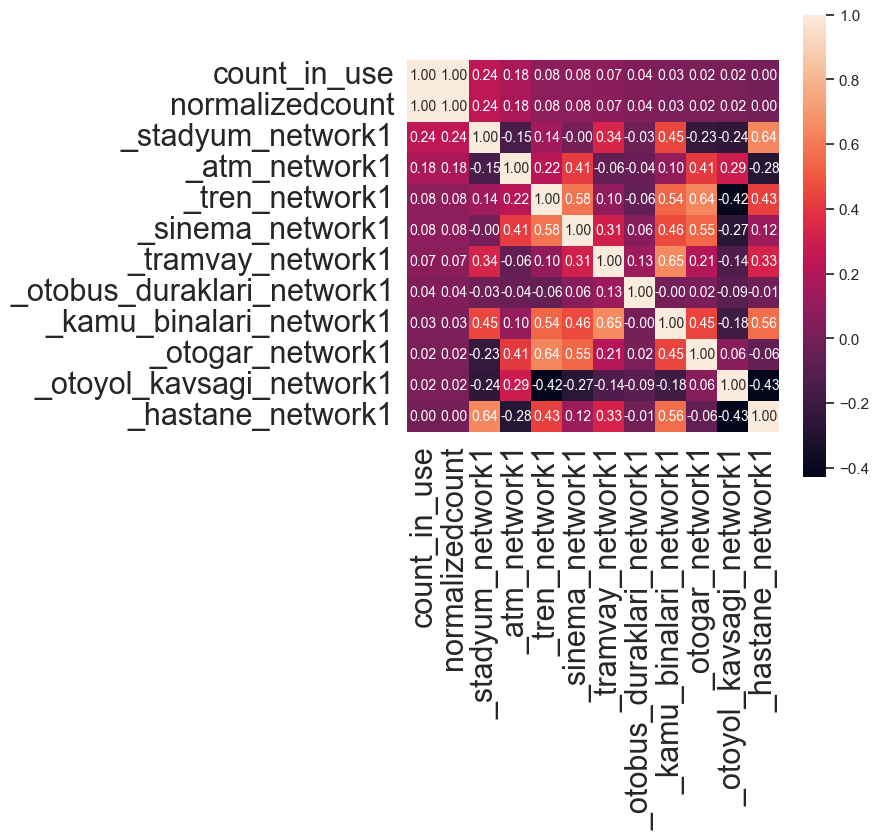

In [9]:
n = 12
most_largest_features = corrmat.nlargest(n, 'count_in_use')['count_in_use'].index
zoomed_corrmat = np.corrcoef(numerical_data[most_largest_features].values.T)
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(font_scale=1)
sns.heatmap(zoomed_corrmat, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=most_largest_features.values, xticklabels=most_largest_features.values)
print(most_largest_features.values)

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


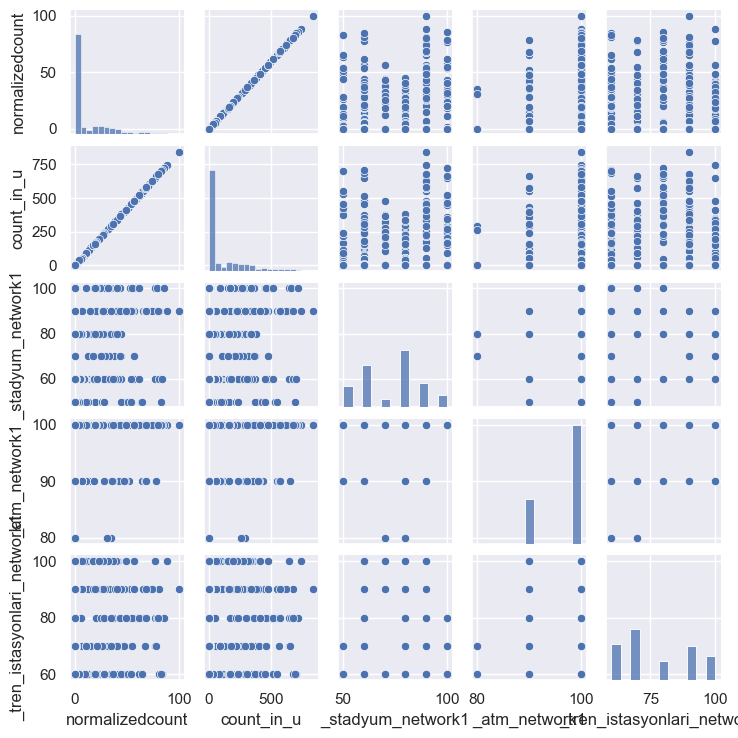

Index(['normalizedcount', 'count_in_u', '_stadyum_network1', '_atm_network1',
       '_tren_istasyonlari_network1'],
      dtype='object')


In [11]:
sns.set()
most_largest_features = corrmat.nlargest(5, 'count_in_u')['count_in_u'].index
sns.pairplot(numerical_data[most_largest_features.values], size=1.5)
plt.show()
print(most_largest_features)

In [10]:
corr_with_price = numerical_data.corr()
corr_with_price = corr_with_price.sort_values(by= 'count_in_use', ascending=False)
corr_with_price['count_in_use']

count_in_use                     1.000000
normalizedcount                  1.000000
_stadyum_network1                0.243467
_atm_network1                    0.175722
_tren_network1                   0.083002
_sinema_network1                 0.081531
_tramvay_network1                0.074821
_otobus_duraklari_network1       0.040004
_kamu_binalari_network1          0.028110
_otogar_network1                 0.018805
_otoyol_kavsagi_network1         0.018439
_hastane_network1                0.000205
_dinlenme_tesisleri_network1    -0.001350
_oteller_network1               -0.014776
_parklar_network1               -0.017841
_eczane_network1                -0.043245
_meydanlar_network1             -0.043691
_universiteler_network1         -0.045170
_metro_duraklari_network1       -0.078107
_avm_network1                   -0.118267
_benzin_istasyonlari_network1   -0.121155
_okullar_network1               -0.124663
_kafe_network1                  -0.138755
_otoparklar_network1              

In [33]:
df2 = df1
df2=df1.drop(['_parklar_network1','count_in_use', 'fid', 'device_id', 'lat', 'lon', 'display_level', 'station_status', 'name1', 'address1', 'city', 'datetime'], axis=1)
df2

,_atm_network1,_avm_network1,_benzin_istasyonlari_network1,_dinlenme_tesisleri_network1,_eczane_network1,_hastane_network1,_kafe_network1,_kamu_binalari_network1,_metro_duraklari_network1,_meydanlar_network1,...,_otogar_network1,_otoparklar_network1,_otoyol_kavsagi_network1,_restoran_network1,_sinema_network1,_stadyum_network1,_tramvay_network1,_tren_network1,_universiteler_network1,normalizedcount
0,100,60,90,0,100,80,100,90,90,100,...,90,100,100,100,100,60,100,90,90,0.000000
1,100,60,90,0,100,80,100,90,90,100,...,90,100,100,100,100,60,100,90,90,0.000000
2,100,60,90,0,100,80,100,90,90,100,...,90,100,100,100,100,60,100,90,90,0.000000
3,100,60,90,0,100,80,100,90,90,100,...,90,100,100,100,100,60,100,90,90,0.000000
4,100,60,90,0,100,80,100,90,90,90,...,90,100,100,100,100,60,100,90,90,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,100,40,80,0,90,100,90,80,100,100,...,60,100,90,100,70,70,80,90,90,68.366702
514,100,40,100,40,100,80,100,90,100,80,...,50,100,90,100,70,80,100,60,90,0.000000
515,100,40,100,40,100,80,100,90,100,80,...,50,100,90,100,70,80,100,60,90,1.517387
516,100,40,100,40,100,80,100,90,100,80,...,50,100,90,100,70,80,100,60,90,0.000000


In [34]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1:]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=2)


print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

#print(X_validation.shape)
#print(y_validation.shape)

(362, 22)
(156, 22)
(362, 1)
(156, 1)


In [18]:
%%time
model = XGBRegressor()
model.fit(X_train, y_train)
print(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
CPU times: user 364 ms, sys: 319 ms, total: 683 ms
Wall time: 83.9 ms


In [19]:
%%time
# make predictions for train data
xgb_y_pred_train = model.predict(X_train)
xgb_train_predictions = [round(value) for value in xgb_y_pred_train]

CPU times: user 10.7 ms, sys: 2.79 ms, total: 13.5 ms
Wall time: 8.36 ms


In [20]:
xgb_train_r2_score = r2_score(y_train, xgb_y_pred_train)
print("R2 Train Score for XGBoost: {}".format(xgb_train_r2_score))

xgb_train_adj_r2_score = 1 - (1-xgb_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for XGBoost: {}".format(xgb_train_adj_r2_score))

xgb_train_mae = mean_absolute_error(y_train, xgb_y_pred_train)
print("Train MAE for XGBoost: {}".format(xgb_train_mae))

xgb_train_mape = mean_absolute_percentage_error(y_train, xgb_y_pred_train)
print("Train MAPE for XGBoost: {}".format(xgb_train_mape))

xgb_train_mse = mean_squared_error(y_train, xgb_y_pred_train)
xgb_train_rmse = np.sqrt(xgb_train_mse)
print("Train RMSE for XGBoost: {}".format(xgb_train_rmse))

R2 Train Score for XGBoost: 0.8525920775283491
Train Adjusted R2 Score for XGBoost: 0.8425016542639207
Train MAE for XGBoost: 3.519731804833567
Train MAPE for XGBoost: 2681473210059799.0
Train RMSE for XGBoost: 7.9256172974401675


In [ ]:
%%time
# make predictions for validation data
xgb_y_pred_val = model.predict(X_validation)
xgb_val_predictions = [round(value) for value in xgb_y_pred_val]

In [51]:
xgb_val_r2_score = r2_score(y_validation, xgb_y_pred_val)
print("R2 Validation for XGBoost: {}".format(xgb_val_r2_score))

xgb_val_adj_r2_score = 1 - (1-xgb_val_r2_score)*(len(y_validation)-1)/(len(y_validation)-X_validation.shape[1]-1)
print("Validation Adjusted R2 Score for XGBoost: {}".format(xgb_val_adj_r2_score))

xgb_val_mae = mean_absolute_error(y_validation, xgb_y_pred_val)
print("Validation MAE for XGBoost: {}".format(xgb_val_mae))

xgb_val_mape = mean_absolute_percentage_error(y_validation, xgb_y_pred_val)
print("Validation MAPE for XGBoost: {}".format(xgb_val_mape))

xgb_val_mse = mean_squared_error(y_validation, xgb_y_pred_val)
xgb_val_rmse = np.sqrt(xgb_val_mse)
print("Validation RMSE for XGBoost: {}".format(xgb_val_rmse))

R2 Validation for XGBoost: 0.34976710883319073
Validation Adjusted R2 Score for XGBoost: -0.44496198037068724
Validation MAE for XGBoost: 4.611822921526333
Validation MAPE for XGBoost: 9103283291828724.0
Validation RMSE for XGBoost: 6.2463851567057


In [22]:
%%time
# make predictions for test data
xgb_y_pred_test = model.predict(X_test)
xgb_test_predictions = [round(value) for value in xgb_y_pred_test]

CPU times: user 6.59 ms, sys: 1.31 ms, total: 7.9 ms
Wall time: 5.99 ms


In [23]:
xgb_test_r2_score = r2_score(y_test, xgb_y_pred_test)
print("Test R2 Score for XGBoost: {}".format(xgb_test_r2_score))

xgb_test_adj_r2_score = 1 - (1-xgb_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for XGBoost: {}".format(xgb_test_adj_r2_score))

xgb_test_mae = mean_absolute_error(y_test, xgb_y_pred_test)
print("Test MAE for XGBoost: {}".format(xgb_test_mae))

xgb_test_mape = mean_absolute_percentage_error(y_test, xgb_y_pred_test)
print("Test MAPE for XGBoost: {}".format(xgb_test_mape))

xgb_test_mse = mean_squared_error(y_test, xgb_y_pred_test)
xgb_test_rmse = np.sqrt(xgb_test_mse)
print("Test RMSE for XGBoost: {}".format(xgb_test_rmse))

Test R2 Score for XGBoost: 0.4488738071448094
Test Adjusted R2 Score for XGBoost: 0.35211119313206607
Test MAE for XGBoost: 8.773117589369159
Test MAPE for XGBoost: 1.5445508437468774e+16
Test RMSE for XGBoost: 16.709702927951092


In [24]:
%%time
model2 = RandomForestRegressor(random_state=1)
model2.fit(X_train, y_train)
print(model2)

RandomForestRegressor(random_state=1)
CPU times: user 88.5 ms, sys: 2.47 ms, total: 90.9 ms
Wall time: 89.9 ms


<timed exec>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [25]:
%%time
# make predictions for train data
rf_y_pred_train = model2.predict(X_train)
rf_train_predictions = [round(value) for value in rf_y_pred_train]

CPU times: user 11.2 ms, sys: 1.45 ms, total: 12.6 ms
Wall time: 11.8 ms


In [26]:
rf_train_r2_score = r2_score(y_train, rf_y_pred_train)
print("Train R2 Score for RandomForest: {}".format(rf_train_r2_score))

rf_train_adj_r2_score = 1 - (1-rf_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for RandomForest: {}".format(rf_train_adj_r2_score))

rf_train_mae = mean_absolute_error(y_train, rf_y_pred_train)
print("Train MAE for RandomForest: {}".format(rf_train_mae))

rf_train_mape = mean_absolute_percentage_error(y_train, rf_y_pred_train)
print("Train MAPE for RandomForest: {}".format(rf_train_mape))

rf_train_mse = mean_squared_error(y_train, rf_y_pred_train)
rf_train_rmse = np.sqrt(rf_train_mse)
print("Train RMSE for RandomForest: {}".format(rf_train_rmse))

Train R2 Score for RandomForest: 0.8339028110234223
Train Adjusted R2 Score for RandomForest: 0.8225330629684781
Train MAE for RandomForest: 4.228435134899152
Train MAPE for RandomForest: 4002292056024773.5
Train RMSE for RandomForest: 8.413056903780587


In [60]:
%%time
# make predictions for validation data
rf_y_pred_val = model2.predict(X_validation)
rf_val_predictions = [round(value) for value in rf_y_pred_val]

CPU times: user 14 ms, sys: 2.54 ms, total: 16.6 ms
Wall time: 14.2 ms


In [61]:
rf_val_r2_score = r2_score(y_validation, rf_y_pred_val)
print("Validation R2 Score for RandomForest: {}".format(rf_val_r2_score))

rf_val_adj_r2_score = 1 - (1-rf_val_r2_score)*(len(y_validation)-1)/(len(y_validation)-X_validation.shape[1]-1)
print("Validation Adjusted R2 Score for RandomForest: {}".format(rf_val_adj_r2_score))

rf_val_mae = mean_absolute_error(y_validation, rf_y_pred_val)
print("Validation MAE for RandomForest: {}".format(rf_val_mae))

rf_val_mape = mean_absolute_percentage_error(y_validation, rf_y_pred_val)
print("Validation MAPE for RandomForest: {}".format(rf_val_mape))

rf_val_mse = mean_squared_error(y_validation, rf_y_pred_val)
rf_val_rmse = np.sqrt(rf_val_mse)
print("Validation RMSE for RandomForest: {}".format(rf_val_rmse))

Validation R2 Score for RandomForest: 0.37907057954170986
Validation Adjusted R2 Score for RandomForest: -0.37984315657397816
Validation MAE for RandomForest: 4.637551334938652
Validation MAPE for RandomForest: 9489462776345768.0
Validation RMSE for RandomForest: 6.104012461416725


In [27]:
%%time
# make predictions for test data
rf_y_pred_test = model2.predict(X_test)
rf_test_predictions = [round(value) for value in rf_y_pred_test]

CPU times: user 9.49 ms, sys: 1.5 ms, total: 11 ms
Wall time: 10.1 ms


In [28]:
rf_test_r2_score = r2_score(y_test, rf_y_pred_test)
print("Test R2 Score for RandomForest: {}".format(rf_test_r2_score))

rf_test_adj_r2_score = 1 - (1-rf_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for RandomForest: {}".format(rf_test_adj_r2_score))

rf_test_mae = mean_absolute_error(y_test, rf_y_pred_test)
print("Test MAE for RandomForest: {}".format(rf_test_mae))

rf_test_mape = mean_absolute_percentage_error(y_test, rf_y_pred_test)
print("Test MAPE for RandomForest: {}".format(rf_test_mape))

rf_test_mse = mean_squared_error(y_test, rf_y_pred_test)
rf_test_rmse = np.sqrt(rf_test_mse)
print("Test RMSE for RandomForest: {}".format(rf_test_rmse))

Test R2 Score for RandomForest: 0.5037026026130145
Test Adjusted R2 Score for RandomForest: 0.4165664183389636
Test MAE for RandomForest: 8.531059919333508
Test MAPE for RandomForest: 1.3686707684856362e+16
Test RMSE for RandomForest: 15.856750831049771


In [37]:
#Random Forest RandomSearch and GridSearch

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [38]:
%%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

CPU times: user 384 ms, sys: 120 ms, total: 504 ms
Wall time: 16.7 s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [39]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [40]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 50, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [200, 500, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [41]:
%%time
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

CPU times: user 691 ms, sys: 55.8 ms, total: 747 ms
Wall time: 9.02 s


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 50, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [200, 500, 1000]},
             verbose=2)

In [42]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [43]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=50, max_features=3, n_estimators=1000)

In [44]:
modelrf =  grid_search.best_estimator_
# make predictions for train data
rf_grid_y_pred_train = modelrf.predict(X_train)
rf_grid_train_predictions = [round(value) for value in rf_grid_y_pred_train]

In [45]:
rf_grid_train_r2_score = r2_score(y_train, rf_grid_y_pred_train)
print("Train R2 Score for RandomForest_GridSearch: {}".format(rf_grid_train_r2_score))

rf_grid_train_adj_r2_score = 1 - (1-rf_grid_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for RandomForest_GridSearch: {}".format(rf_grid_train_adj_r2_score))

rf_grid_train_mae = mean_absolute_error(y_train, rf_grid_y_pred_train)
print("Train MAE for RandomForest_GridSearch: {}".format(rf_grid_train_mae))

rf_grid_train_mape = mean_absolute_percentage_error(y_train, rf_grid_y_pred_train)
print("Train MAPE for RandomForest_GridSearch: {}".format(rf_grid_train_mape))

rf_grid_train_mse = mean_squared_error(y_train, rf_grid_y_pred_train)
rf_grid_train_rmse = np.sqrt(rf_grid_train_mse)
print("Train RMSE for RandomForest_GridSearch: {}".format(rf_grid_train_rmse))

Train R2 Score for RandomForest_GridSearch: 0.8723832448489557
Train Adjusted R2 Score for RandomForest_GridSearch: 0.8641013315353185
Train MAE for RandomForest_GridSearch: 4.343049541914433
Train MAPE for RandomForest_GridSearch: 4606913203838984.0
Train RMSE for RandomForest_GridSearch: 8.807081183013073


In [46]:
# make predictions for test data
rf_grid_y_pred_test = modelrf.predict(X_test)
rf_grid_test_predictions = [round(value) for value in rf_grid_y_pred_test]

In [47]:
rf_grid_test_r2_score = r2_score(y_test, rf_grid_y_pred_test)
print("Test R2 Score for RandomForest_GridSearch: {}".format(rf_grid_train_r2_score))

rf_grid_test_adj_r2_score = 1 - (1-rf_grid_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for RandomForest_GridSearch: {}".format(rf_grid_test_adj_r2_score))

rf_grid_test_mae = mean_absolute_error(y_test, rf_grid_y_pred_test)
print("Test MAE for RandomForest_GridSearch: {}".format(rf_grid_test_mae))

rf_grid_test_mape = mean_absolute_percentage_error(y_test, rf_grid_y_pred_test)
print("Test MAPE for RandomForest_GridSearch: {}".format(rf_grid_test_mape))

rf_grid_test_mse = mean_squared_error(y_test, rf_grid_y_pred_test)
rf_grid_test_rmse = np.sqrt(rf_grid_test_mse)
print("Test RMSE for RandomForest_GridSearch: {}".format(rf_grid_test_rmse))

Test R2 Score for RandomForest_GridSearch: 0.8723832448489557
Test Adjusted R2 Score for RandomForest_GridSearch: 0.7446848438532157
Test MAE for RandomForest_GridSearch: 6.583789167962873
Test MAPE for RandomForest_GridSearch: 7454778433128402.0
Test RMSE for RandomForest_GridSearch: 11.806743146476654


In [9]:
%%time
#LightGBM
model4 = lgbm.LGBMRegressor(learning_rate=0.05, n_estimators=500)
model4.fit(X_train, y_train)
print(model4)

LGBMRegressor(learning_rate=0.05, n_estimators=500)
Wall time: 1min 15s


In [10]:
%%time
# make predictions for train data
lgbm_y_pred_train = model4.predict(X_train)
lgbm_train_predictions = [round(value) for value in lgbm_y_pred_train]

Wall time: 27.7 s


In [11]:
lgbm_train_r2_score = r2_score(y_train, lgbm_y_pred_train)
print("Train R2 Score for LightGBM: {}".format(lgbm_train_r2_score))

lgbm_train_adj_r2_score = 1 - (1-lgbm_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for LightGBM: {}".format(lgbm_train_adj_r2_score))

lgbm_train_mae = mean_absolute_error(y_train, lgbm_y_pred_train)
print("Train MAE for LightGBM: {}".format(lgbm_train_mae))

lgbm_train_mape = mean_absolute_percentage_error(y_train, lgbm_y_pred_train)
print("Train MAPE for LightGBM: {}".format(lgbm_train_mape))

lgbm_train_mse = mean_squared_error(y_train, lgbm_y_pred_train)
lgbm_train_rmse = np.sqrt(lgbm_train_mse)
print("Train RMSE for LightGBM: {}".format(lgbm_train_rmse))

Train R2 Score for LightGBM: 0.8286410583552236
Train Adjusted R2 Score for LightGBM: 0.828639202471855
Train MAE for LightGBM: 64996.61871105683
Train MAPE for LightGBM: 0.3181852871740201
Train RMSE for LightGBM: 110607.75303572249


In [12]:
%%time
# make predictions for validation data
lgbm_y_pred_val = model4.predict(X_validation)
lgbm_val_predictions = [round(value) for value in lgbm_y_pred_val]

Wall time: 1.48 s


In [13]:
lgbm_val_r2_score = r2_score(y_validation, lgbm_y_pred_val)
print("Validation R2 Score for LightGBM: {}".format(lgbm_val_r2_score))

lgbm_val_adj_r2_score = 1 - (1-lgbm_val_r2_score)*(len(y_validation)-1)/(len(y_validation)-X_validation.shape[1]-1)
print("Validation Adjusted R2 Score for LightGBM: {}".format(lgbm_val_adj_r2_score))

lgbm_val_mae = mean_absolute_error(y_validation, lgbm_y_pred_val)
print("Validation MAE for LightGBM: {}".format(lgbm_val_mae))

lgbm_val_mape = mean_absolute_percentage_error(y_validation, lgbm_y_pred_val)
print("Validation MAPE for LightGBM: {}".format(lgbm_val_mape))

lgbm_val_mse = mean_squared_error(y_validation, lgbm_y_pred_val)
lgbm_val_rmse = np.sqrt(lgbm_val_mse)
print("Validation RMSE for LightGBM: {}".format(lgbm_val_rmse))

Validation R2 Score for LightGBM: 0.8051359306590924
Validation Adjusted R2 Score for LightGBM: 0.8050958242184493
Validation MAE for LightGBM: 65166.30726411509
Validation MAPE for LightGBM: 0.31797012200616726
Validation RMSE for LightGBM: 116143.49141960399


In [14]:
# make predictions for test data
lgbm_y_pred_test = model4.predict(X_test)
lgbm_test_predictions = [round(value) for value in lgbm_y_pred_test]

In [15]:
lgbm_test_r2_score = r2_score(y_test, lgbm_y_pred_test)
print("Test R2 Score for LightGBM: {}".format(lgbm_test_r2_score))

lgbm_test_adj_r2_score = 1 - (1-lgbm_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for LightGBM: {}".format(lgbm_test_adj_r2_score))

lgbm_test_mae = mean_absolute_error(y_test, lgbm_y_pred_test)
print("Test MAE for LightGBM: {}".format(lgbm_test_mae))

lgbm_test_mape = mean_absolute_percentage_error(y_test, lgbm_y_pred_test)
print("Test MAPE for LightGBM: {}".format(lgbm_test_mape))

lgbm_test_mse = mean_squared_error(y_test, lgbm_y_pred_test)
lgbm_test_rmse = np.sqrt(lgbm_test_mse)
print("Test RMSE for LightGBM: {}".format(lgbm_test_rmse))

Test R2 Score for LightGBM: 0.8064254981614662
Test Adjusted R2 Score for LightGBM: 0.8063876495134286
Test MAE for LightGBM: 65709.30578043745
Test MAPE for LightGBM: 0.3201569420749583
Test RMSE for LightGBM: 118862.59477054738


In [31]:
%%time
#CatBoost
model5 = CatBoostRegressor(n_estimators=2000)
model5.fit(X_train, y_train)
print(model5)

Learning rate set to 0.105254
0:	learn: 252529.6049567	total: 524ms	remaining: 17m 27s
1:	learn: 239597.8513967	total: 911ms	remaining: 15m 9s
2:	learn: 228530.7689823	total: 1.29s	remaining: 14m 19s
3:	learn: 218547.0129465	total: 1.68s	remaining: 13m 57s
4:	learn: 209993.9399170	total: 2.09s	remaining: 13m 54s
5:	learn: 202504.9318247	total: 2.48s	remaining: 13m 44s
6:	learn: 196206.4227408	total: 2.83s	remaining: 13m 27s
7:	learn: 190681.7942241	total: 3.24s	remaining: 13m 27s
8:	learn: 185910.5433871	total: 3.63s	remaining: 13m 22s
9:	learn: 181838.0272300	total: 4.04s	remaining: 13m 24s
10:	learn: 178094.3427423	total: 4.42s	remaining: 13m 18s
11:	learn: 174992.6489953	total: 4.81s	remaining: 13m 16s
12:	learn: 172010.3808936	total: 5.21s	remaining: 13m 17s
13:	learn: 169447.9174133	total: 5.62s	remaining: 13m 17s
14:	learn: 167107.9776512	total: 6.01s	remaining: 13m 15s
15:	learn: 165197.9265918	total: 6.42s	remaining: 13m 16s
16:	learn: 163370.2315761	total: 6.84s	remaining: 13m

In [32]:
%%time
# make predictions for train data
catboost_y_pred_train = model5.predict(X_train)
catboost_train_predictions = [round(value) for value in catboost_y_pred_train]

Wall time: 7.6 s


In [33]:
catboost_train_r2_score = r2_score(y_train, catboost_y_pred_train)
print("R2 Train Score for CatBoost: {}".format(catboost_train_r2_score))

catboost_train_adj_r2_score = 1 - (1-catboost_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for CatBoost: {}".format(catboost_train_adj_r2_score))

catboost_train_mae = mean_absolute_error(y_train, catboost_y_pred_train)
print("Train MAE for CatBoost: {}".format(catboost_train_mae))

catboost_train_mape = mean_absolute_percentage_error(y_train, catboost_y_pred_train)
print("Train MAPE for CatBoost: {}".format(catboost_train_mape))

catboost_train_mse = mean_squared_error(y_train, catboost_y_pred_train)
catboost_train_rmse = np.sqrt(catboost_train_mse)
print("Train RMSE for CatBoost: {}".format(catboost_train_rmse))

R2 Train Score for CatBoost: 0.8655775884780812
Train Adjusted R2 Score for CatBoost: 0.8655761591017848
Train MAE for CatBoost: 55796.51474361633
Train MAPE for CatBoost: 0.26400548314832034
Train RMSE for CatBoost: 97964.34191692546


In [34]:
%%time
# make predictions for validation data
catboost_y_pred_val = model5.predict(X_validation)
catboost_val_predictions = [round(value) for value in catboost_y_pred_val]

Wall time: 468 ms


In [35]:
catboost_val_r2_score = r2_score(y_validation, catboost_y_pred_val)
print("Validation R2 Score for CatBoost: {}".format(catboost_val_r2_score))

catboost_val_adj_r2_score = 1 - (1-catboost_val_r2_score)*(len(y_validation)-1)/(len(y_validation)-X_validation.shape[1]-1)
print("Validation Adjusted R2 Score for CatBoost: {}".format(catboost_val_adj_r2_score))

catboost_val_mae = mean_absolute_error(y_validation, catboost_y_pred_val)
print("Validation MAE for CatBoost: {}".format(catboost_val_mae))

catboost_val_mape = mean_absolute_percentage_error(y_validation, catboost_y_pred_val)
print("Validation MAPE for CatBoost: {}".format(catboost_val_mape))

catboost_val_mse = mean_squared_error(y_validation, catboost_y_pred_val)
catboost_val_rmse = np.sqrt(catboost_val_mse)
print("Validation RMSE for CatBoost: {}".format(catboost_val_rmse))

Validation R2 Score for CatBoost: 0.8350567058347397
Validation Adjusted R2 Score for CatBoost: 0.8350233749791223
Validation MAE for CatBoost: 56263.431700434645
Validation MAPE for CatBoost: 0.26470787205733165
Validation RMSE for CatBoost: 106855.36334740111


In [36]:
# make predictions for test data
catboost_y_pred_test = model5.predict(X_test)
catboost_test_predictions = [round(value) for value in catboost_y_pred_test]

In [37]:
catboost_test_r2_score = r2_score(y_test, catboost_y_pred_test)
print("Test R2 Score for CatBoost: {}".format(catboost_test_r2_score))

catboost_test_adj_r2_score = 1 - (1-catboost_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for CatBoost: {}".format(catboost_test_adj_r2_score))

catboost_test_mae = mean_absolute_error(y_test, catboost_y_pred_test)
print("Test MAE for CatBoost: {}".format(catboost_test_mae))

catboost_test_mape = mean_absolute_percentage_error(y_test, catboost_y_pred_test)
print("Test MAPE for CatBoost: {}".format(catboost_test_mape))

catboost_test_mse = mean_squared_error(y_test, catboost_y_pred_test)
catboost_test_rmse = np.sqrt(catboost_test_mse)
print("Test RMSE for CatBoost: {}".format(catboost_test_rmse))

Test R2 Score for CatBoost: 0.8379913463715487
Test Adjusted R2 Score for CatBoost: 0.8379602456861617
Test MAE for CatBoost: 56668.976184935804
Test MAPE for CatBoost: 0.2659677217125825
Test RMSE for CatBoost: 108740.22766895825


In [38]:
# import Standard Scaler package. It will scaler the data around 0
from sklearn.preprocessing import StandardScaler

# Create object of StandardScaler()
scaler = StandardScaler()

# Now go and study i.e. fit() and give exam i.e. transform() on X_train
X_train = scaler.fit_transform(X_train)

# Now the entire intelligence to scale the data is stored in the variable 'scaler' i.e.
# study is already done and now we can keep on using transform() as many times as we want

X_test = scaler.transform(X_test)

In [39]:
%%time
#LinearRegression
model6 = LinearRegression()
model6.fit(X_train, y_train)
print(model6)

LinearRegression()
Wall time: 8.39 s


In [40]:
%%time
# make predictions for train data
lin_y_pred_train = model6.predict(X_train)
lin_train_predictions = [round(value) for value in lin_y_pred_train]

Wall time: 7.02 s


In [41]:
lin_train_r2_score = r2_score(y_train, lin_y_pred_train)
print("Train R2 Score for LinearRegression: {}".format(lin_train_r2_score))

lin_train_adj_r2_score = 1 - (1-lin_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for LinearRegression: {}".format(lin_train_adj_r2_score))

lin_train_mae = mean_absolute_error(y_train, lin_y_pred_train)
print("Train MAE for LinearRegression: {}".format(lin_train_mae))

lin_train_mape = mean_absolute_percentage_error(y_train, lin_y_pred_train)
print("Train MAPE for LinearRegression: {}".format(lin_train_mape))

lin_train_mse = mean_squared_error(y_train, lin_y_pred_train)
lin_train_rmse = np.sqrt(lgbm_train_mse)
print("Train RMSE for LinearRegression: {}".format(lin_train_rmse))

Train R2 Score for LinearRegression: 0.45505947521966206
Train Adjusted R2 Score for LinearRegression: 0.4550536806124962
Train MAE for LinearRegression: 100949.07055330864
Train MAPE for LinearRegression: 0.4964011590795884
Train RMSE for LinearRegression: 110420.67328523577


In [42]:
%%time
# make predictions for validation data
lin_y_pred_val = model6.predict(X_validation)
lin_val_predictions = [round(value) for value in lin_y_pred_val]

C:\Users\METE\anaconda3\envs\geo\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Wall time: 429 ms


In [43]:
lin_val_r2_score = r2_score(y_validation, lin_y_pred_val)
print("Validation R2 Score for LinearRegression: {}".format(lin_val_r2_score))

lin_val_adj_r2_score = 1 - (1-lin_val_r2_score)*(len(y_validation)-1)/(len(y_validation)-X_validation.shape[1]-1)
print("Validation Adjusted R2 Score for LinearRegression: {}".format(lin_val_adj_r2_score))

lin_val_mae = mean_absolute_error(y_validation, lin_y_pred_val)
print("Validation MAE for LinearRegression: {}".format(lin_val_mae))

lin_val_mape = mean_absolute_percentage_error(y_validation, lin_y_pred_val)
print("Validation MAPE for LinearRegression: {}".format(lin_val_mape))

lin_val_mse = mean_squared_error(y_validation, lin_y_pred_val)
lin_val_rmse = np.sqrt(lin_val_mse)
print("Validation RMSE for LinearRegression: {}".format(lin_val_rmse))

Validation R2 Score for LinearRegression: -8.169267450856633e+18
Validation Adjusted R2 Score for LinearRegression: -8.170918252577808e+18
Validation MAE for LinearRegression: 747036773202101.1
Validation MAPE for LinearRegression: 4530853139.425681
Validation RMSE for LinearRegression: 752004692780117.1


In [44]:
# make predictions for test data
lin_y_pred_test = model6.predict(X_test)
lin_test_predictions = [round(value) for value in lin_y_pred_test]

In [45]:
lin_test_r2_score = r2_score(y_test, lin_y_pred_test)
print("Test R2 Score for LinearRegression: {}".format(lin_test_r2_score))

lin_test_adj_r2_score = 1 - (1-lin_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for LinearRegression: {}".format(lin_test_adj_r2_score))

lin_test_mae = mean_absolute_error(y_test, lin_y_pred_test)
print("Test MAE for LinearRegression: {}".format(lin_test_mae))

lin_test_mape = mean_absolute_percentage_error(y_test, lin_y_pred_test)
print("Test MAPE for LinearRegression: {}".format(lin_test_mape))

lin_test_mse = mean_squared_error(y_test, lin_y_pred_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("Test RMSE for LinearRegression: {}".format(lin_test_rmse))

Test R2 Score for LinearRegression: 0.4472764616557263
Test Adjusted R2 Score for LinearRegression: 0.4471703557133151
Test MAE for LinearRegression: 101442.60356679621
Test MAPE for LinearRegression: 0.4986674571854904
Test RMSE for LinearRegression: 200851.51479729582


In [48]:
importance = pd.DataFrame({"Importance": modelrf.feature_importances_},
                         index=X.columns)

In [49]:
importance

,Importance
_atm_network1,0.032754
_avm_network1,0.066838
_benzin_istasyonlari_network1,0.054595
_dinlenme_tesisleri_network1,0.005188
_eczane_network1,0.020356
_hastane_network1,0.079305
_kafe_network1,0.022322
_kamu_binalari_network1,0.041451
_metro_duraklari_network1,0.022418
_meydanlar_network1,0.095515


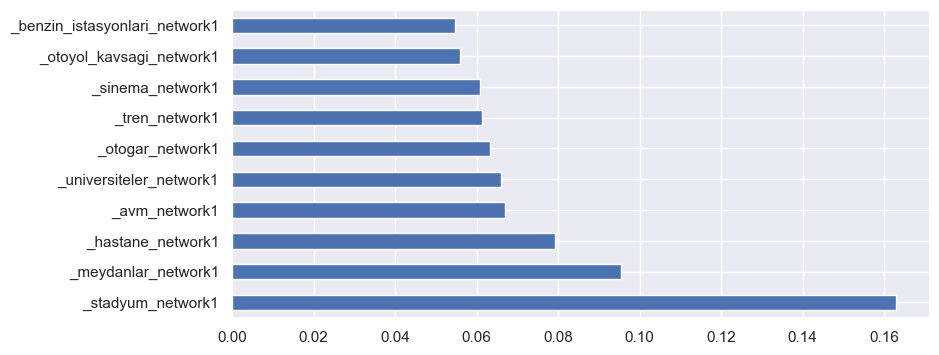

In [50]:
feat_importances = pd.Series(modelrf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
fig= ax.figure
fig.set_size_inches(9, 4)

In [82]:
#XGB Feature Importance
ax = xgb.plot_importance(model, max_num_features=10, importance_type='gain', show_values=True) 

fig = ax.figure
fig.set_size_inches(10, 3)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 10 µs


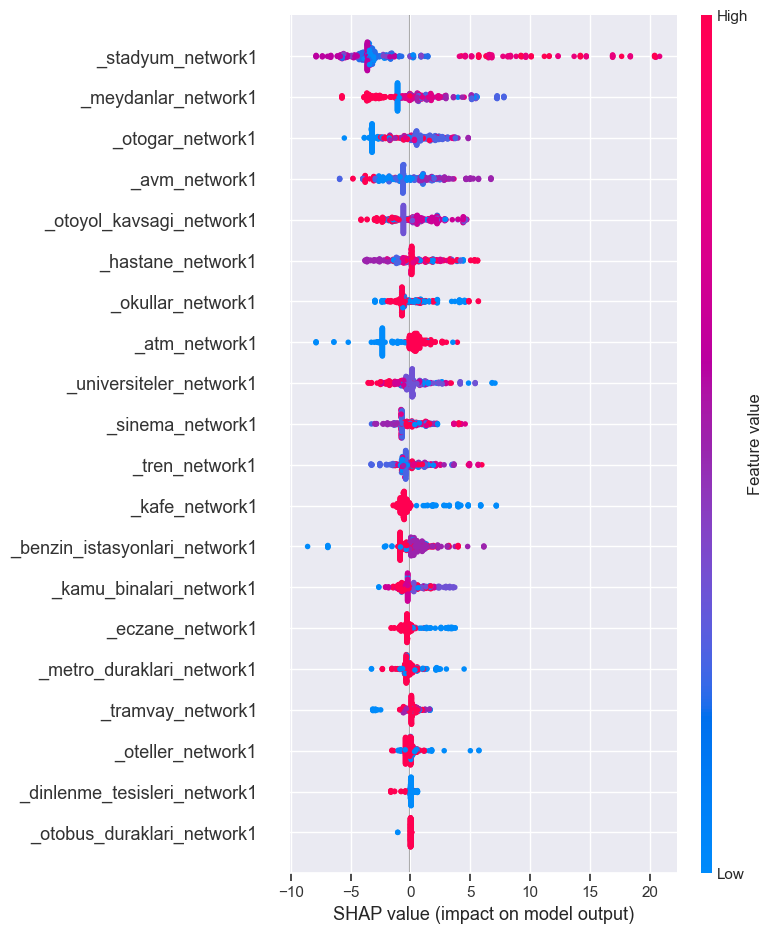

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   1.1s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   0.7s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   1.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END bootstrap=True, max_depth=50

In [51]:
import shap
shap.initjs()

# Let us have a look on SHAP summary plot
%time
samples = X_train

explainer = shap.TreeExplainer(modelrf)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

shap.summary_plot(shap_values, samples)

In [ ]:
df5 = pd.DataFrame(data = {
    'actual':y_test, 
    'predicted':rf_y_pred_test
    })
ax = sns.lmplot(x='actual', y='predicted', data = df5)
fig= ax.figure

In [27]:
X = df5.iloc[:, :-1].values # feature
y = df5.iloc[:, -1].values # label

reg = LinearRegression().fit(X, y)

print(f"Score: {reg.score(X, y)}")
print(f"Coefficient: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

Score: 0.8580391570108803
Coefficient: [0.84762917]
Intercept: 41040.16817455951


In [29]:
df5

,actual,predicted
3603012,58500,47589.00
2536666,360000,345280.00
4400118,285000,287416.40
3092418,93000,87494.00
5128856,86000,77586.00
...,...,...
5573841,88000,134343.50
5595037,330000,294979.00
1382379,57800,69467.30
4618845,199995,222273.35
